# Cohort analysis

As part of the final assigment, I also made a cohort analysis to see whether there is any pattern in the number of returning readers on Dilan's blog.<br>
Since this analysis did not reveal useful insights it was not inculded in the solution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Data import

In [2]:
# importing the data of new and returning readers
new_readers = pd.read_csv('/.../.../.../new_readers.csv', delimiter = ';', 
            names = ['my_date', 'my_time', 'event_type', 'country', 'user_id', 'source', 'topic',])

ret_readers = pd.read_csv('/.../.../.../ret_readers.csv', delimiter = ';', 
            names = ['my_date', 'my_time', 'event_type', 'country', 'user_id', 'topic',])

To check if the data import was correct.

In [3]:
new_readers.head()

,my_date,my_time,event_type,country,user_id,source,topic
0,2018-01-01,00:01:01,read,country_7,2458151261,SEO,North America
1,2018-01-01,00:03:20,read,country_7,2458151262,SEO,South America
2,2018-01-01,00:04:01,read,country_7,2458151263,AdWords,Africa
3,2018-01-01,00:04:02,read,country_7,2458151264,AdWords,Europe
4,2018-01-01,00:05:03,read,country_8,2458151265,Reddit,North America


In [4]:
ret_readers.head()

,my_date,my_time,event_type,country,user_id,topic
0,2018-01-01,02:20:18,read,country_5,2458151287,North America
1,2018-01-01,02:53:39,read,country_4,2458151279,Asia
2,2018-01-01,03:34:22,read,country_4,2458151525,Africa
3,2018-01-01,03:36:18,read,country_5,2458151287,Asia
4,2018-01-01,03:40:42,read,country_5,2458151315,South America


In [5]:
new_readers.count()

my_date       210023
my_time       210023
event_type    210023
country       210023
user_id       210023
source        210023
topic         210023
dtype: int64

In [6]:
ret_readers.count()

my_date       371854
my_time       371854
event_type    371854
country       371854
user_id       371854
topic         371854
dtype: int64

### Concatenation of the imported data frames 

In [7]:
# to select the columns that will be used in the analysis
new_readers = new_readers[['my_date', 'user_id']]
ret_readers = ret_readers[['my_date', 'user_id']]

In [8]:
# concatenation
conc_data = pd.concat([new_readers, ret_readers])

In [9]:
# to check if the concatenation was correct
conc_data.count()

my_date    581877
user_id    581877
dtype: int64

In [11]:
conc_data.sort_values(['user_id', 'my_date']).head(30)   # it's not necessary for the analysis but could be useful to see

,my_date,user_id
0,2018-01-01,2458151261
1,2018-01-01,2458151262
2,2018-01-01,2458151263
3,2018-01-01,2458151264
4,2018-01-01,2458151265
5,2018-01-01,2458151266
6,2018-01-01,2458151267
338439,2018-03-27,2458151267
7,2018-01-01,2458151268
8,2018-01-01,2458151269


### Creating a nested list that contains the dates - dates that belong to the same user are in sublist

In [12]:
nested_list = []
ID = conc_data.user_id.min()
diff = conc_data.user_id.max() - conc_data.user_id.min() # to calculate the number of iterations

for i in range(diff):
    sublist = conc_data[conc_data.user_id == ID].my_date.tolist()
    nested_list.append(sublist)
    ID += 1

In [13]:
nested_list[:30]

[['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01', '2018-03-27'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01', '2018-03-04', '2018-03-05', '2018-03-05', '2018-03-05'],
 ['2018-01-01'],
 ['2018-01-01',
  '2018-02-24',
  '2018-02-25',
  '2018-02-25',
  '2018-02-26',
  '2018-02-26'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01',
  '2018-01-31',
  '2018-02-01',
  '2018-02-02',
  '2018-02-02',
  '2018-02-03',
  '2018-02-03'],
 ['2018-01-01'],
 ['2018-01-01', '2018-03-05'],
 ['2018-01-01',
  '2018-01-01',
  '2018-01-01',
  '2018-01-02',
  '2018-01-03',
  '2018-01-04',
  '2018-01-04',
  '2018-01-04',
  '2018-01-04',
  '2018-01-05',
  '2018-01-05',
  '2018-01-06'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01', '2018-01-28', '2018-01-29'],
 ['2018-01-01'],
 ['2018-01-01'],
 ['2018-01-01',
  '2018-01-01',
  '2018-01-01',
  '2018-01-02',
  '2018-01-03',
  '2018-01-04'

### Creating a list of dates

In [14]:
dates = pd.date_range(start="2018-01-01", end="2018-03-15")  # the last two weeks are dropped
date_list = [x.strftime("%Y-%m-%d") for x in dates]

### Creating a data frame for the cohort analysis

In [15]:
chrt = []
dys = []
usrs = []

for cohort_date in date_list:
    days = 0
    for act_date in date_list[date_list.index(cohort_date):date_list.index(cohort_date)+31]:
        n_users = 0
        for user in nested_list:
            if act_date in user and user[0] == cohort_date:
                n_users += 1
        chrt.append(cohort_date)
        dys.append(days)
        usrs.append(n_users)
        days += 1

In [16]:
# dictionary of the above lists
cohort_dict = {'cohort':chrt, 'days_passed':dys, 'number_of_users':usrs}

In [17]:
# the final data frame
cohort_df = pd.DataFrame(cohort_dict)

In [18]:
cohort_df.head()

,cohort,days_passed,number_of_users
0,2018-01-01,0,1795
1,2018-01-01,1,37
2,2018-01-01,2,28
3,2018-01-01,3,35
4,2018-01-01,4,26


### Heatmap to plot the results

The number of the users were log transformed. Otherwise, the very high number of new users in each cohort, compared to the amount of returning users, masked any pattern.

In [19]:
# log transformation
cohort_df['log2_values'] = np.log2(cohort_df['number_of_users'])
cohort_df['log10_values'] = np.log10(cohort_df['number_of_users'])

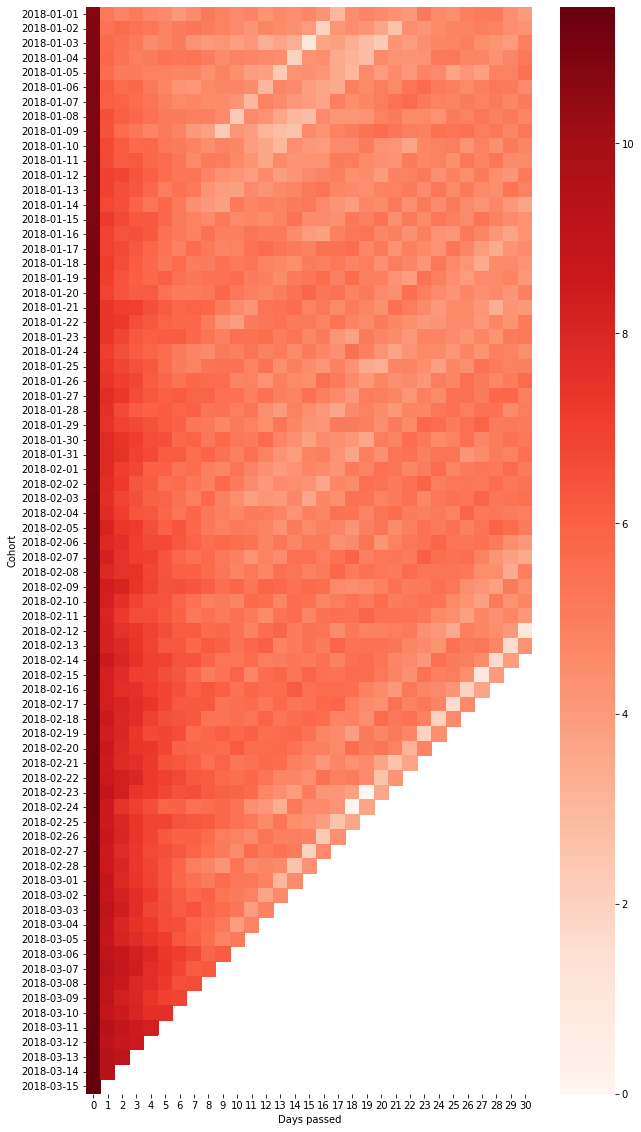

In [20]:
# pivot the df to make it accessible for the heatmap
cohort_pivot = cohort_df.pivot(index='cohort', columns='days_passed', values='log2_values')

# heatmap - log2 transformed values were used
plt.figure(figsize=(10,20))
sns.heatmap(cohort_pivot, cmap='Reds')
plt.ylabel('Cohort')
plt.xlabel('Days passed')
plt.show()